# Loading Probability Distributions in a Quantum circuit

Authors of paper: Kalyan Dasgupta, Binoy Paine

Link to paper: https://arxiv.org/abs/2208.13372

Notebook by: Óscar Amaro (2023)

In [1]:
# Import packages to build circuits
from qiskit import QuantumCircuit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter, ParameterVector
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
import numpy as np
from numpy import pi, exp, log, sqrt
from qiskit import IBMQ, Aer, execute
import matplotlib.pyplot as plt

### Figure 3: Effect of rotation gates on qubits

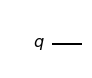

In [2]:
num_qubit = 1
qc = QuantumCircuit(num_qubit)
qc.draw('mpl')

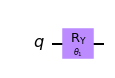

In [3]:
num_qubit = 1
qc = QuantumCircuit(num_qubit)
theta1 = Parameter('$θ_1$')
qc.ry(theta1,0)
qc.draw('mpl')

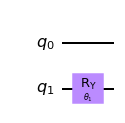

In [4]:
num_qubit = 2
qc = QuantumCircuit(num_qubit)
theta1 = Parameter('$θ_1$')
qc.ry(theta1,1)
qc.draw('mpl')

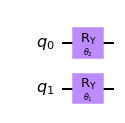

In [5]:
num_qubit = 2
qc = QuantumCircuit(num_qubit)
theta1 = Parameter('$θ_1$')
theta2 = Parameter('$θ_2$')
qc.ry(theta1,1)
qc.ry(theta2,0)
qc.draw('mpl')

# if Parameters could be run symbolically, one would get the results in figure 3
#backend = Aer.get_backend('statevector_simulator')
#result = execute(qc, backend, shots=1000).result()
#statevector = result.get_statevector(circuit)
#print(statevector)

### Figure 7: Distribution of probability amplitudes after the application of the CNOT gate

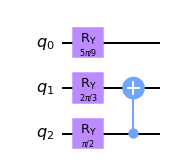

In [6]:
num_qubit = 3
qc = QuantumCircuit(num_qubit)
theta3= 100/180*pi
theta2=2*pi/3
theta1=pi/2
qc.ry(theta3,0)
qc.ry(theta2,1)
qc.ry(theta1,2)
qc.cx(2,1)
qc.draw('mpl')

/Users/oscaramaro/opt/anaconda3/envs/QPPQ/lib/python3.8/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


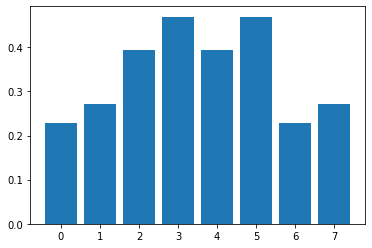

In [7]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend, shots=1000).result()
statevector = result.get_statevector(qc)
plt.bar(np.arange(0,2**3), np.array(statevector))
plt.show()

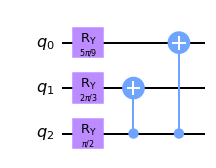

In [8]:
num_qubit = 3
qc = QuantumCircuit(num_qubit)
theta3= 100/180*pi
theta2=2*pi/3
theta1=pi/2
qc.ry(theta3,0)
qc.ry(theta2,1)
qc.ry(theta1,2)
qc.cx(2,1)
qc.cx(2,0)
qc.draw('mpl')

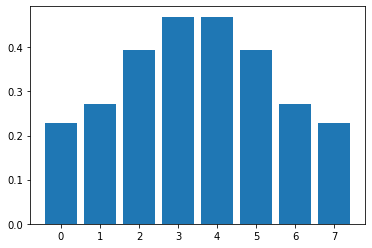

In [9]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend, shots=1000).result()
statevector = result.get_statevector(qc)
plt.bar(np.arange(0,2**3), np.array(statevector))
plt.show()

### Figure 8: Generating the tail side of the asymmetric distribution where MSB qubit is in state |1〉

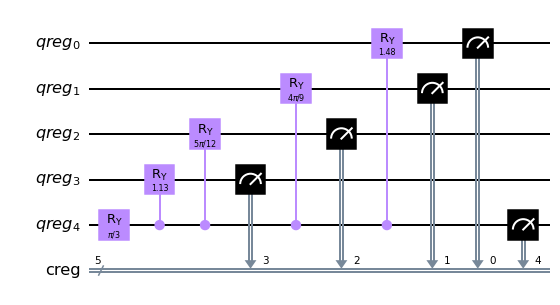

In [10]:
num_qubit = 5
qreg = QuantumRegister(num_qubit, "qreg")
creg = ClassicalRegister(num_qubit, "creg")
qc = QuantumCircuit(qreg, creg)

theta1 = pi/3
theta2 = 65/180*pi
theta3 = 75/180*pi
theta4 = 80/180*pi
theta5 = 85/180*pi
qc.ry(theta1,4)
qc.cry(theta2,4,3)
qc.cry(theta3,4,2)
qc.cry(theta4,4,1)
qc.cry(theta5,4,0)
qc.measure(qreg, creg)
qc.draw('mpl')

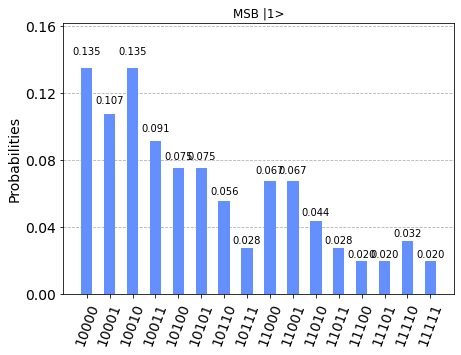

In [11]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend)
counts = job.result().get_counts()
counts1 = {k: v for k, v in counts.items() if k[0]=='1'}
plot_histogram(counts1, title="MSB |1>")

### Figure 9: The side of a log-normal distribution where the MSB qubit is in state |0〉

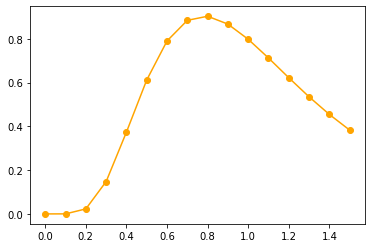

In [12]:
def lognorm(x,mu,sigma):
    return 1/(x*sigma*sqrt(2*pi))*exp(-(log(x)-mu)**2/(2*sigma**2))
x = np.linspace(1e-3,1.5,2**4)
plt.plot(x,lognorm(x,0,0.5),'o-',color='orange')
plt.show()